In [21]:
import importlib
import eval_functions
importlib.reload(eval_functions)
from eval_functions import *
import pandas as pd
from enum import Enum
import numpy as n

# make tables interactive
from itables import init_notebook_mode
import itables.options as opt
init_notebook_mode(all_interactive=True, connected=True)
opt.maxBytes=0

In [22]:
NOODLER_VERSION="notcont-721245e-84ecd6a"
OLD_NOODLER_VERSION="130017a-84ecd6a"
if NOODLER_VERSION == "":
    NOODLER_VERSION = OLD_NOODLER_VERSION
NOODLER=f"z3-noodler-{NOODLER_VERSION}"
NOODLER_ONLY_STABILIZATION=f"z3-noodler-only-stabilization-{NOODLER_VERSION}"
NOODLER_STATS=f"z3-noodler-stats-{NOODLER_VERSION}"
NOODLER_NO_NIELSEN_STATS=f"z3-noodler-no-nielsen-stats-{NOODLER_VERSION}"
NOODLER_NO_LENGTH_STATS=f"z3-noodler-no-length-stats-{NOODLER_VERSION}"
NOODLER_NO_MEMB_STATS=f"z3-noodler-no-memb-stats-{NOODLER_VERSION}"
NOODLER_STATS=f"z3-noodler-stats-{NOODLER_VERSION}"
NOODLER_MODEL=f"z3-noodler-model-{NOODLER_VERSION}"
NOODLER_CHECK_MODEL=f"check-model-{NOODLER_VERSION}"
OLD_NOODLER=f"z3-noodler-{OLD_NOODLER_VERSION}"
OLD_NOODLER_MODEL=f"z3-noodler-model-{OLD_NOODLER_VERSION}"
CVC5="cvc5-1.2.0"
CVC5_MODEL="cvc5-model-1.2.0"
Z3="z3-4.13.3"
Z3_MODEL="z3-model-4.13.0"
Z3STR4="z3str4"
OSTRICH="ostrich-70545314"
Z3STR3RE="z3strRE"
Z3TRAU="z3-trau-1.1"
Z3ALPHA="z3-alpha-smtcomp2024"

if NOODLER == "":
  NOODLER = OLD_NOODLER

TOOLS = list(dict.fromkeys([ # small hack so that we get list of unique values (i.e. a set, but also in the given order; see https://stackoverflow.com/questions/1653970/does-python-have-an-ordered-set)
    NOODLER,
    OLD_NOODLER,
    CVC5,
    Z3,
    #NOODLER_MODEL,
    #OLD_NOODLER_MODEL,
    #CVC5_MODEL,
    #Z3_MODEL,
    # NOODLER_CHECK_MODEL,
    # NOODLER_STATS,
    # NOODLER_NO_NIELSEN_STATS,
    # NOODLER_NO_LENGTH_STATS,
    # NOODLER_NO_MEMB_STATS,
    # NOODLER_ONLY_STABILIZATION,
    # Z3STR4,
    #Z3ALPHA,
    OSTRICH,
    # Z3STR3RE,
    # Z3TRAU,

    # you can add more tools here directly if needed
]))

VBS = [
    # [Z3, CVC5],
    # [NOODLER, CVC5],
    # [NOODLER, Z3],
    # [NOODLER, Z3, CVC5],
]

TOOLS_STATS = [NOODLER_STATS, NOODLER_NO_NIELSEN_STATS, NOODLER_NO_LENGTH_STATS, NOODLER_NO_MEMB_STATS]


bench_selection = (
  # Select one:
    "NORMAL"
    # "INT_CONVS"
    # "QF_S"
    # "QF_SLIA"
    # "QF_SNIA"
    # "ZALIGVINDER"
    # "REGEX"
)

if bench_selection == "NORMAL":
  BENCHES = [
      # "sygus_qgen",
      # "denghang",
      # "automatark",
      # "stringfuzz",
      # "redos",

      # "norn",
      # "slog",
      # "slent",
      # "omark",
      # "kepler",
      # "woorpje",
      # "webapp",
      # "kaluza",

      # "transducer_plus",
      # "leetcode",
      # "str_small_rw",
      # "pyex",
      # "full_str_int",

      # "snia",
      "selected_hard",
      "django",
      "thefuck",
      "biopython",
      ]
elif bench_selection == "INT_CONVS":
  # Only benchmarks with to_int/from_int
  BENCHES = [
      "stringfuzz",
      "str_small_rw",
      "full_str_int",
  ]
elif bench_selection == "QF_S":
  BENCHES = [
      "sygus_qgen",
      "automatark",

      "slog",
      "woorpje",
  ]
elif bench_selection == "QF_SLIA":
  BENCHES = [
      "denghang",
      "stringfuzz",

      "norn",
      "slent",
      "transducer_plus",
      "kepler",
      "woorpje",
      "webapp",
      "kaluza",
      "redos",

      "leetcode",
      "str_small_rw",
      "pyex",
      "full_str_int",
  ]
elif bench_selection == "QF_SNIA":
  BENCHES = [
    "snia"
  ]
elif bench_selection == "ZALIGVINDER":
  BENCHES = [
    "zaligvinder"
  ]
elif bench_selection == "REGEX":
  BENCHES = [
    "regex"
  ]

REGEX_GROUP_NAME = "regex"
EQUATIONS_GROUP_NAME = "equations"
PREDICATES_GROUP_NAME = "predicates"

BENCHMARK_TO_GROUP = {
    "sygus_qgen": REGEX_GROUP_NAME,
    "denghang": REGEX_GROUP_NAME,
    "automatark": REGEX_GROUP_NAME,
    "stringfuzz": REGEX_GROUP_NAME,
    "redos": REGEX_GROUP_NAME,

    "norn": EQUATIONS_GROUP_NAME,
    "slog": EQUATIONS_GROUP_NAME,
    "slent": EQUATIONS_GROUP_NAME,
    "omark": EQUATIONS_GROUP_NAME,
    "kepler": EQUATIONS_GROUP_NAME,
    "woorpje": EQUATIONS_GROUP_NAME,
    "webapp": EQUATIONS_GROUP_NAME,
    "kaluza": EQUATIONS_GROUP_NAME,
    "snia": EQUATIONS_GROUP_NAME,

    "transducer_plus": PREDICATES_GROUP_NAME,
    "leetcode": PREDICATES_GROUP_NAME,
    "str_small_rw": PREDICATES_GROUP_NAME,
    "pyex": PREDICATES_GROUP_NAME,
    "full_str_int": PREDICATES_GROUP_NAME,
    "django": PREDICATES_GROUP_NAME,
    "thefuck": PREDICATES_GROUP_NAME,
    "biopython": PREDICATES_GROUP_NAME,
    "notcontains": PREDICATES_GROUP_NAME,
    "selected_hard": PREDICATES_GROUP_NAME,
}

REGEX_BENCHES = [
    "sygus_qgen",
    "denghang",
    "automatark",
    "stringfuzz",
    "redos",
]

EQUATIONS_BENCHES = [
    "norn",
    "slog",
    "slent",
    "omark",
    "kepler",
    "woorpje",
    "webapp",
    "kaluza",
]

PREDICATES_BENCHES = [
    "transducer_plus",
    "leetcode",
    "str_small_rw",
    "pyex",
    "full_str_int",
    "django",
    "thefuck",
    "biopython",
]

BENCHES_GROUPS = {
    REGEX_GROUP_NAME: REGEX_BENCHES,
    EQUATIONS_GROUP_NAME: EQUATIONS_BENCHES,
    PREDICATES_GROUP_NAME: PREDICATES_BENCHES,
}

In [23]:
df_all = load_benches(BENCHES, TOOLS, bench_selection, BENCHMARK_TO_GROUP)

# TODO VBS are ugly for now, will fix it
for vbs in VBS:
  name = "+".join(vbs)
  df_all = add_vbs(df_all, vbs, name)
  df_all_stats = add_vbs(df_all_stats, vbs, name)
  TOOLS.append(name)
  # tool_names_mapping[name] = " + ".join([tool_names_mapping[tool] for tool in vbs])

df_all["benchmark_group"] = pd.Categorical(df_all["benchmark"].apply(lambda x: BENCHMARK_TO_GROUP[x]), categories=[EQUATIONS_GROUP_NAME, PREDICATES_GROUP_NAME, REGEX_GROUP_NAME], ordered=True)

### Evaluation

In [5]:
print(simple_table(df_all, TOOLS, BENCHES, separately=False))
print(simple_table(df_all, TOOLS, BENCHES, separately=True))

# of formulae: 150287
--------------------------------------------------
tool                                    ✅    ❌        time    avg    med    std    sat    unsat    unknown    TO    MO+ERR    other
----------------------------------  ------  ----  ----------  -----  -----  -----  -----  -------  ---------  ----  --------  -------
z3-noodler-notcont-721245e-84ecd6a  150077   210     7605.77   0.05   0.01   0.50  18026   132051          0   183        27        0
z3-noodler-130017a-84ecd6a          148779  1508     9567.59   0.06   0.01   1.05  17208   131571       1065   417        26        0
cvc5-1.2.0                          149668   619    18040.94   0.12   0.02   1.49  18216   131452          0   619         0        0
z3-4.13.3                           148141  2146    32620.54   0.22   0.01   2.92  17691   130450          0  2144         2        0
ostrich-70545314                    141380  8907  1849465.87  13.08   5.74  19.35  13345   128035          0  8907         0 

In [6]:
TOOL_FOR_COMPARISON = NOODLER
# TOOL_FOR_COMPARISON = NOODLER_MODEL
# TOOL_FOR_COMPARISON = NOODLER_CHECK_MODEL
# TOOL_FOR_COMPARISON =

<Axes: xlabel='Instances', ylabel='Runtime [s]'>

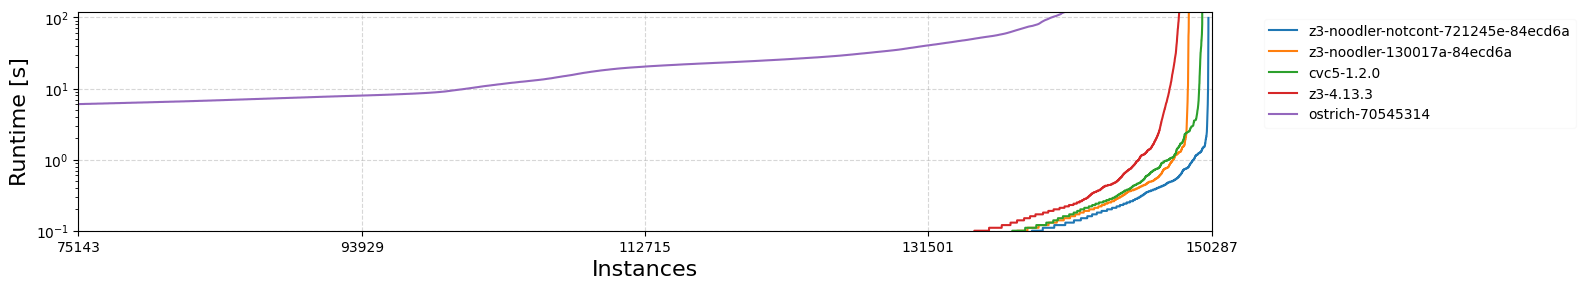

In [25]:
cactus_plot(df_all, [tool for tool in TOOLS if tool not in [
    NOODLER_STATS,
    NOODLER_NO_NIELSEN_STATS,
    NOODLER_NO_LENGTH_STATS,
    NOODLER_NO_MEMB_STATS,
    NOODLER_ONLY_STABILIZATION,
]], start=int(len(df_all)*0.5), 
height=3, width=16, put_legend_outside=True, logarithmic_y_axis=True,
                  # num_of_x_ticks=6,
                )

/var/folders/k8/vb71jppj43x35pc3qvksjy4w0000gn/T/ipykernel_82229/1164031655.py:3: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().
/Users/vhavlena/Documents/VeriFIT/Repo/String/smt-string-bench-results/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10


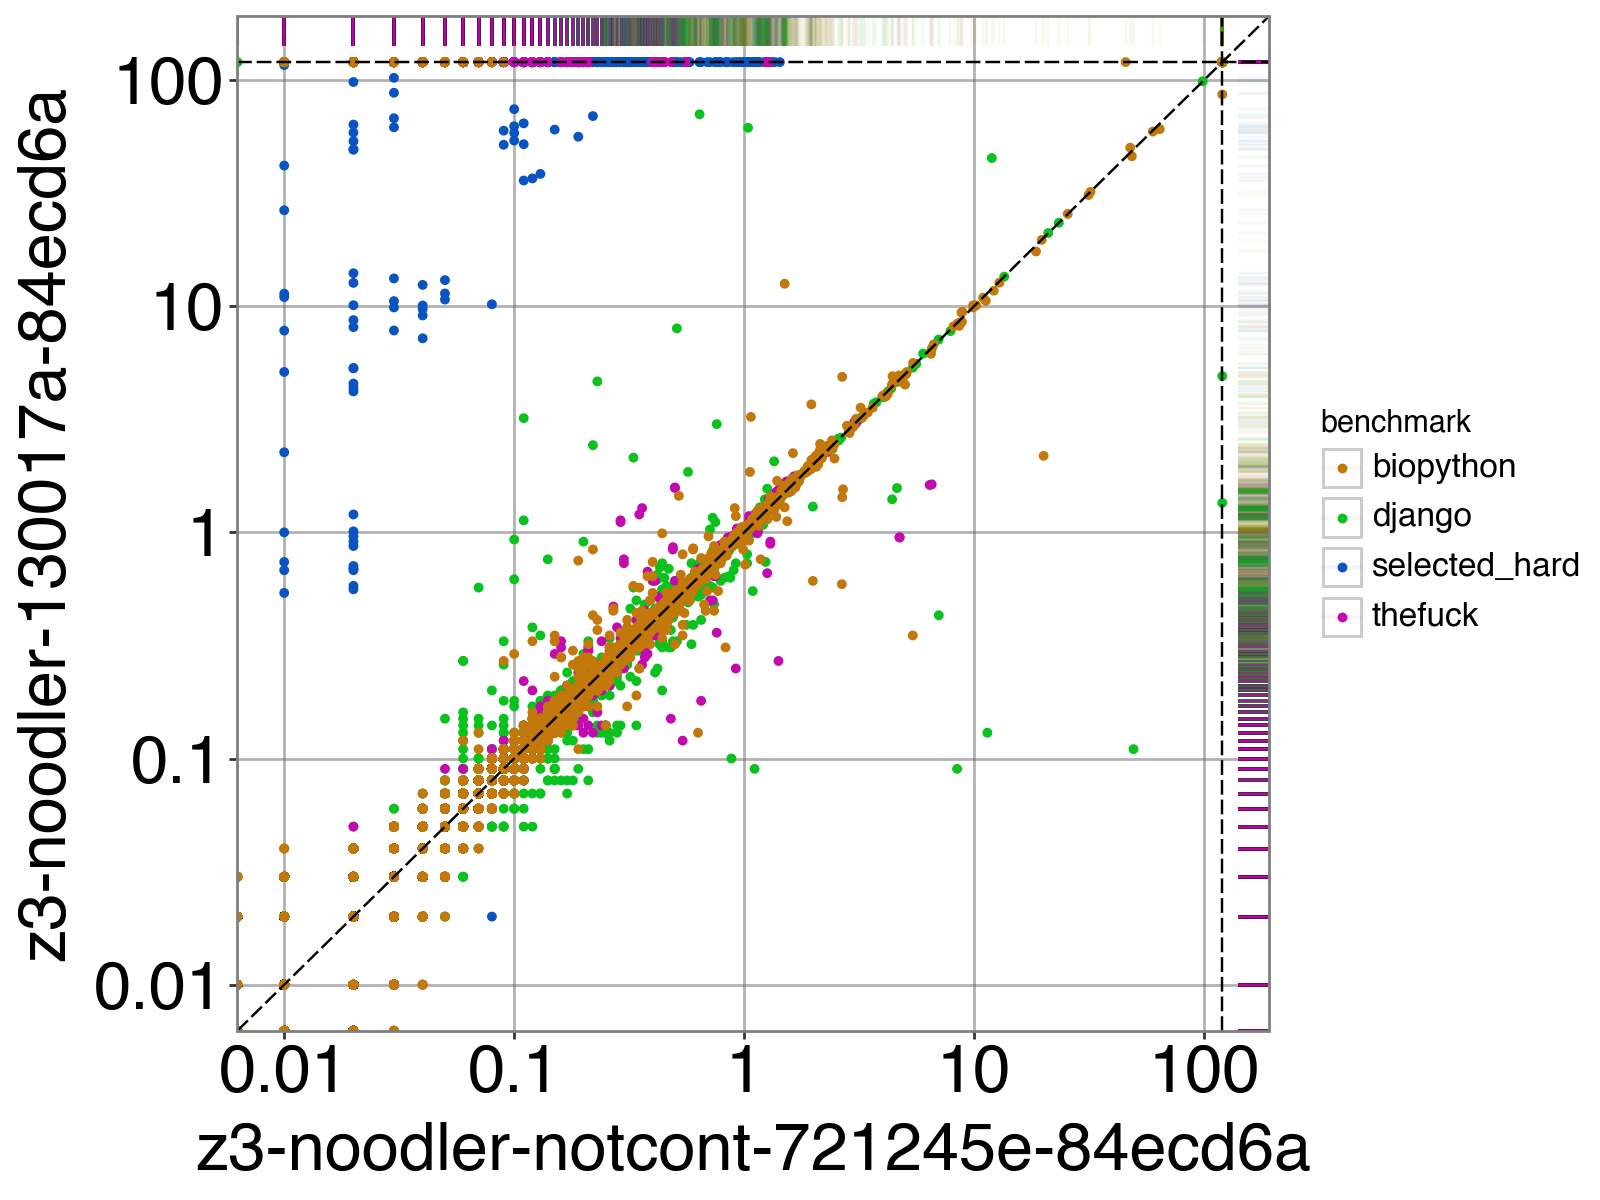

/var/folders/k8/vb71jppj43x35pc3qvksjy4w0000gn/T/ipykernel_82229/1164031655.py:3: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().
/Users/vhavlena/Documents/VeriFIT/Repo/String/smt-string-bench-results/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10


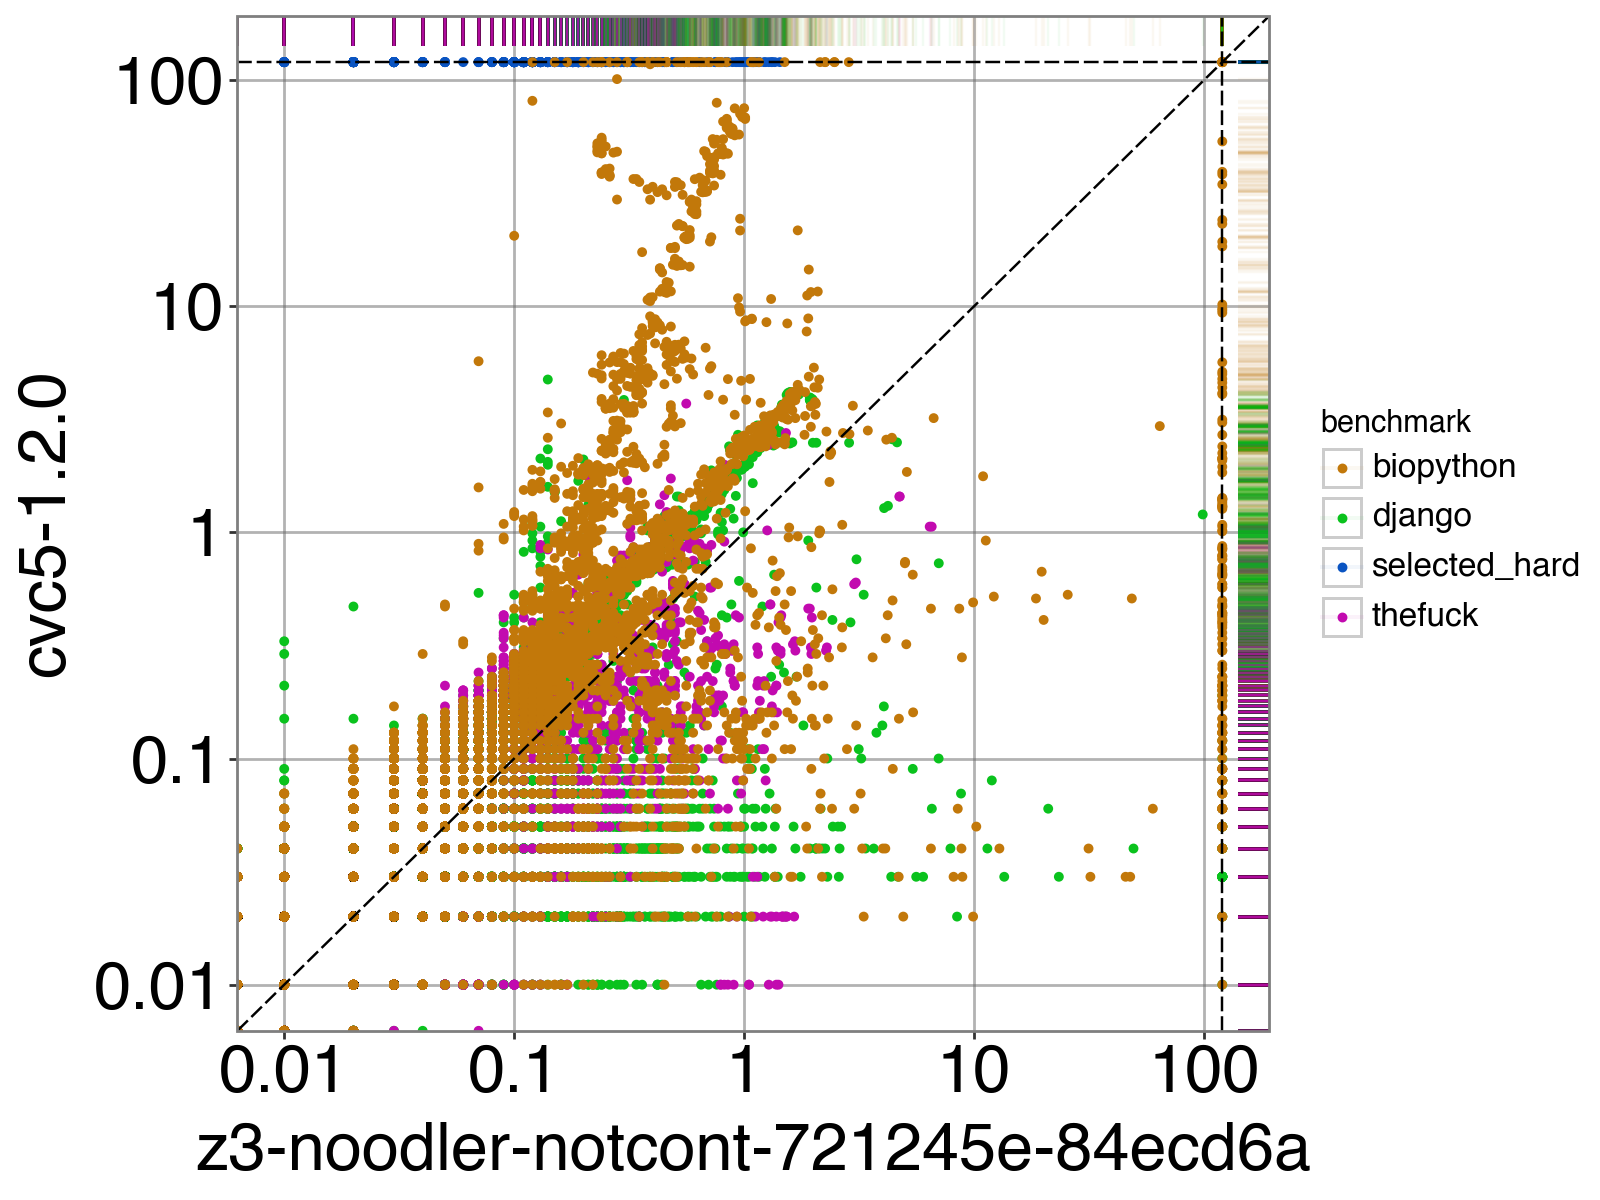

/var/folders/k8/vb71jppj43x35pc3qvksjy4w0000gn/T/ipykernel_82229/1164031655.py:3: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().
/Users/vhavlena/Documents/VeriFIT/Repo/String/smt-string-bench-results/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10


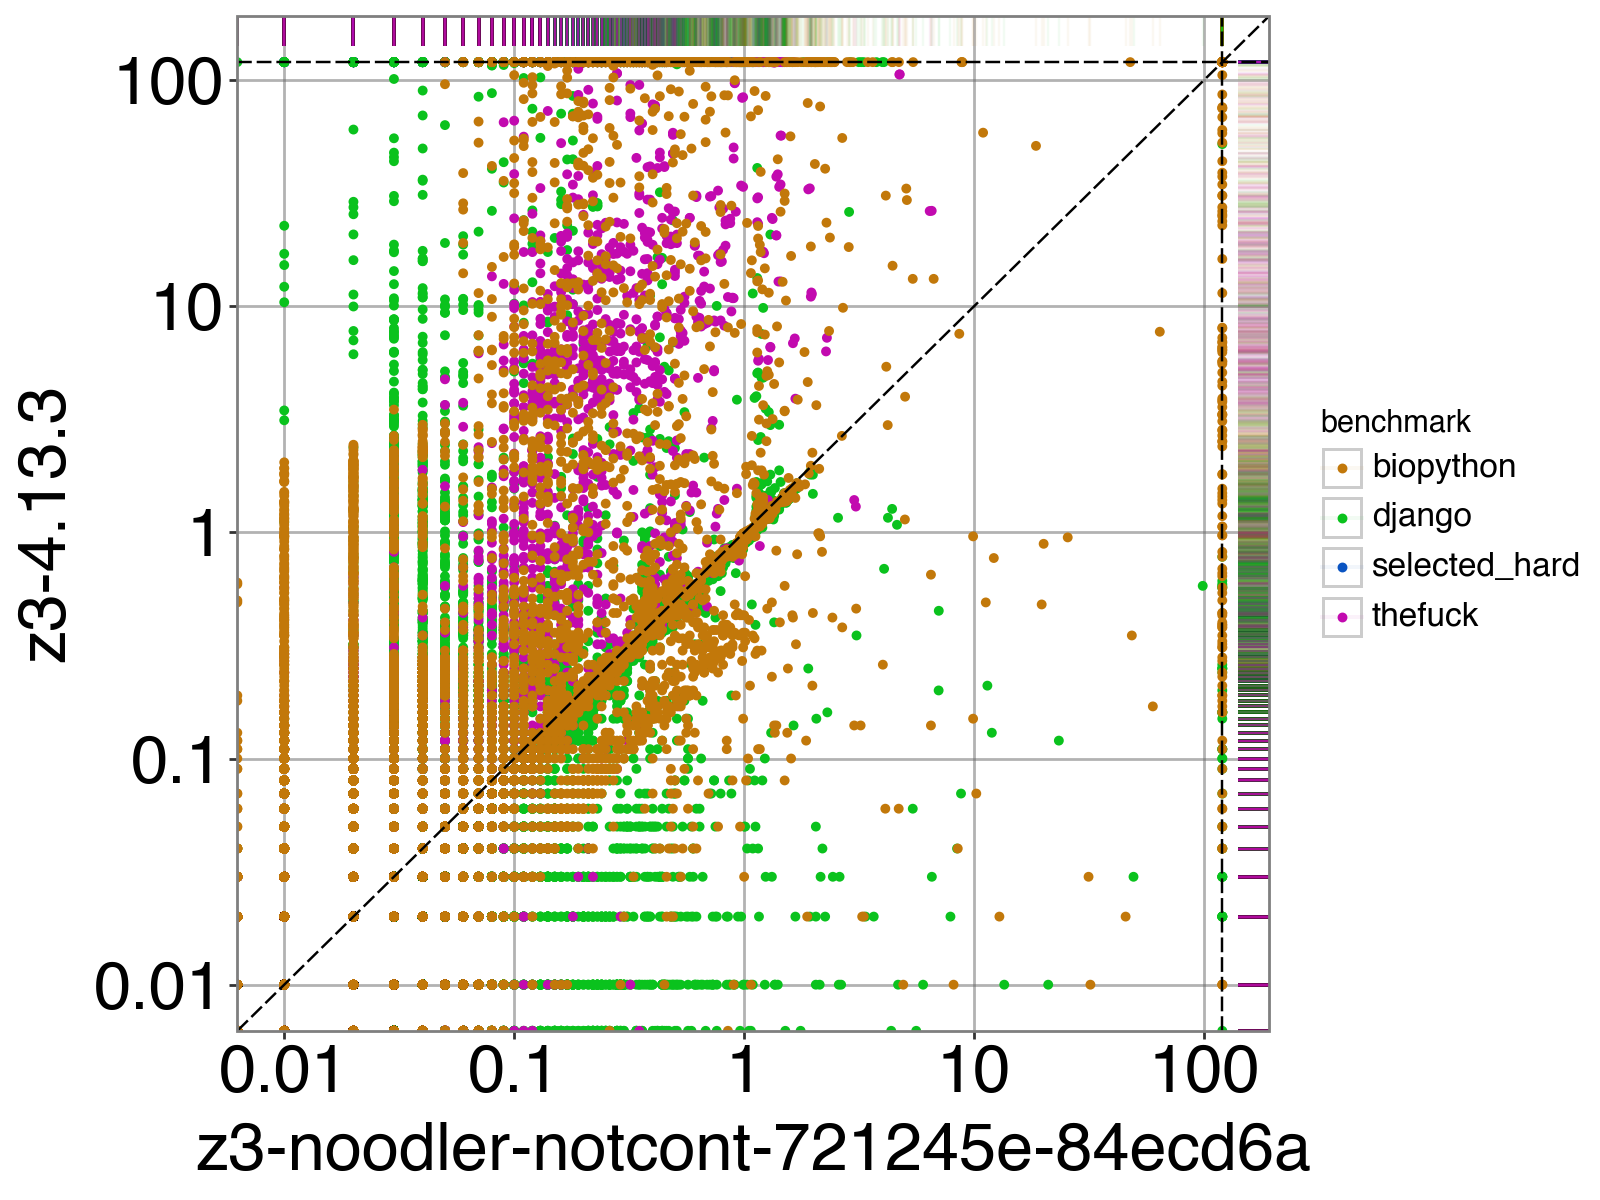

/var/folders/k8/vb71jppj43x35pc3qvksjy4w0000gn/T/ipykernel_82229/1164031655.py:3: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().
/Users/vhavlena/Documents/VeriFIT/Repo/String/smt-string-bench-results/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10


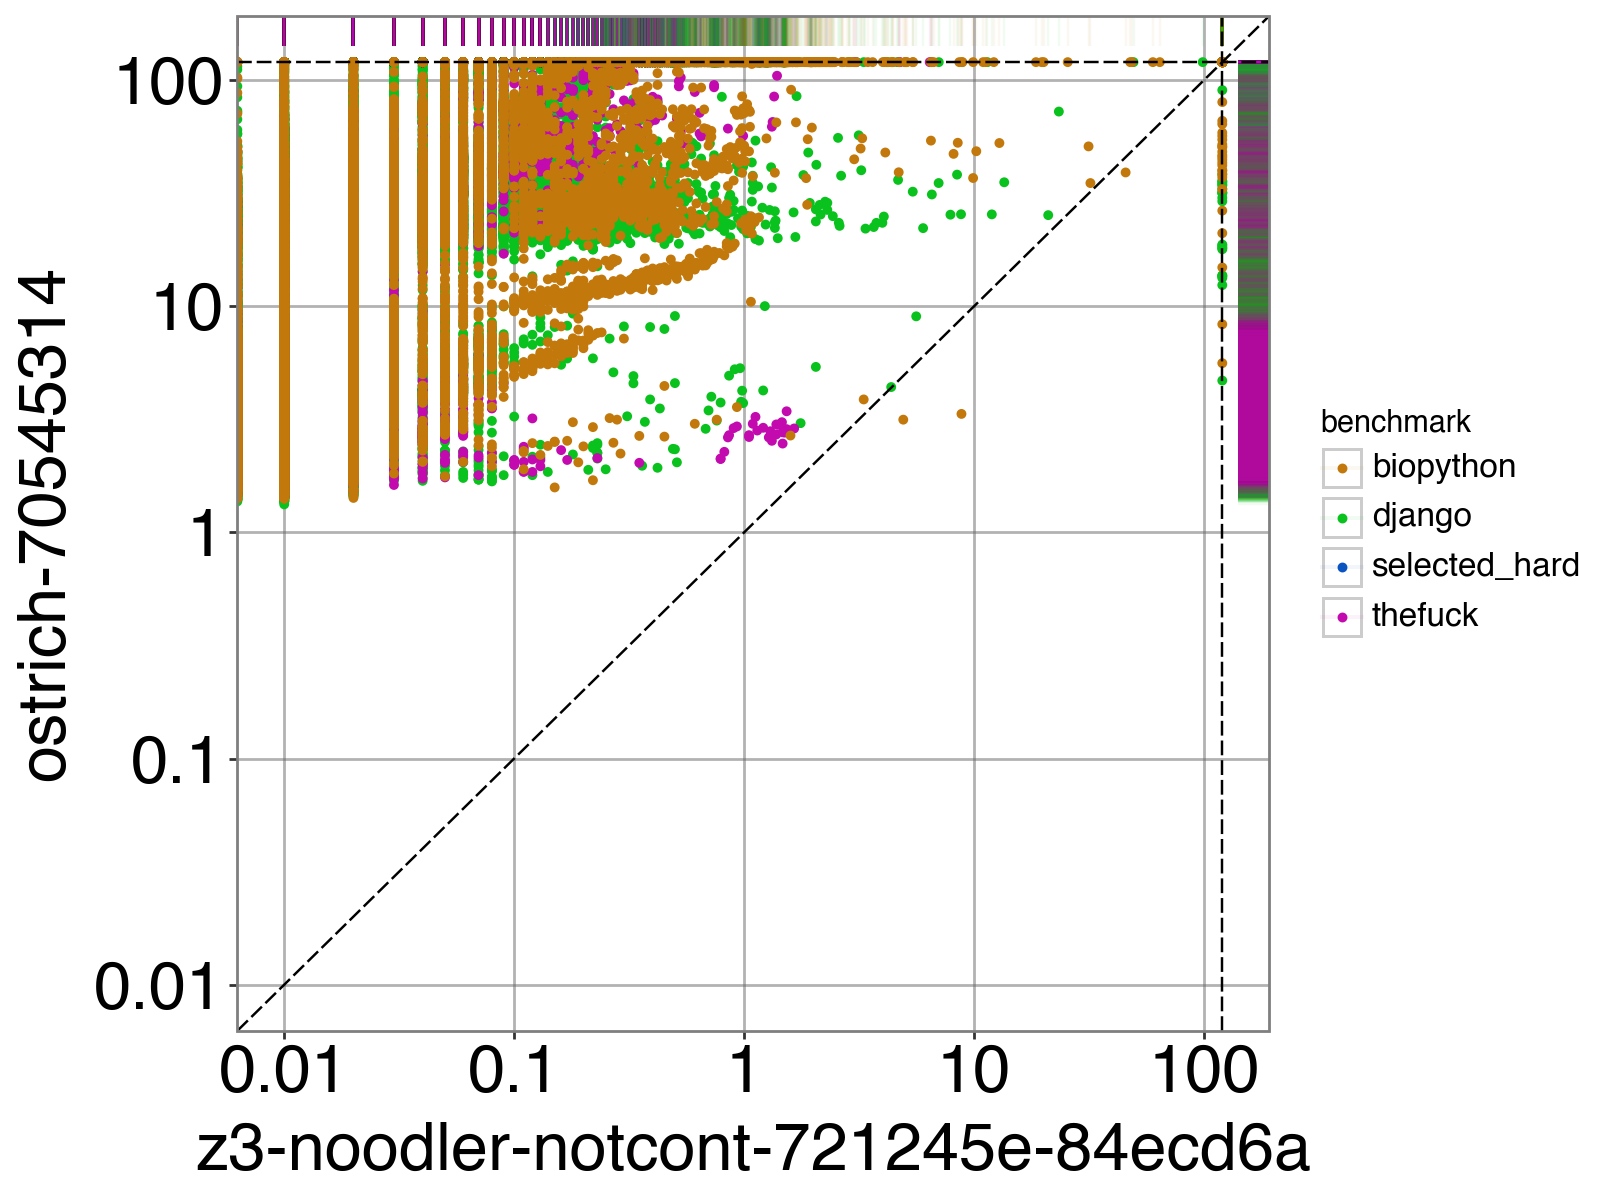

In [29]:
for tool in TOOLS:
    if tool != TOOL_FOR_COMPARISON:
        print(scatter_plot(df_all, TOOL_FOR_COMPARISON, tool, color_column="benchmark"))


### More detailed evaluation

In [7]:
# check if noodler does not return different result than other solvers (i.e. wrong sat/unsat)
sanity_check(df_all, TOOL_FOR_COMPARISON, [tool for tool in TOOLS if tool!=TOOL_FOR_COMPARISON])

benchmark benchmark-group  \
31795    django      predicates   
31815    django      predicates   
31892    django      predicates   
31935    django      predicates   
31948    django      predicates   
31971    django      predicates   
32017    django      predicates   
32202    django      predicates   

                                                    name  \
31795  ../formulae/trauc_benchmarks/django_3/08_djang...   
31815  ../formulae/trauc_benchmarks/django_3/08_djang...   
31892  ../formulae/trauc_benchmarks/django_3/08_djang...   
31935  ../formulae/trauc_benchmarks/django_3/08_djang...   
31948  ../formulae/trauc_benchmarks/django_3/08_djang...   
31971  ../formulae/trauc_benchmarks/django_3/08_djang...   
32017  ../formulae/trauc_benchmarks/django_3/08_djang...   
32202  ../formulae/trauc_benchmarks/django_3/08_djang...   

      z3-noodler-notcont-721245e-84ecd6a-result  \
31795                                       sat   
31815                                       sat   
31892                                       sat   
31935                                       sat   
31948                                       sat   
31971                                       sat   
32017                                       sat   
32202                                       sat   

       z3-noodler-notcont-721245e-84ecd6a-runtime  \
31795                                        0.05   
31815                                        0.03   
31892                                        0.07   
31935                                        0.04   
31948                                        0.08   
31971                                        0.06   
32017                                        0.05   
32202                                        0.06   

      z3-noodler-130017a-84ecd6a-result  z3-noodler-130017a-84ecd6a-runtime  \
31795                               sat                                0.04   
31815                               sat                                0.04   
31892                               sat                                0.06   
31935                               sat                                0.04   
31948                               sat                                0.08   
31971                               sat                                0.06   
32017                               sat                                0.05   
32202                               sat                                0.06   

      cvc5-1.2.0-result  cvc5-1.2.0-runtime z3-4.13.3-result  \
31795               sat                0.03              sat   
31815               sat                0.02              sat   
31892               sat                0.02              sat   
31935               sat                0.02              sat   
31948               sat                0.02              sat   
31971               sat                0.04              sat   
32017               sat                0.04              sat   
32202               sat                0.04              sat   

       z3-4.13.3-runtime ostrich-70545314-result  ostrich-70545314-runtime  \
31795               0.02                   unsat                      6.08   
31815               0.01                   unsat                      3.87   
31892               0.02                   unsat                      3.03   
31935               0.01                   unsat                     19.76   
31948               0.03                   unsat                     20.88   
31971               0.04                   unsat                     21.77   
32017               0.02                   unsat                     20.11   
32202               0.03                   unsat                      8.40   

      benchmark_group  
31795      predicates  
31815      predicates  
31892      predicates  
31935      predicates  
31948      predicates  
31971      predicates  
32017      predicates  
32202      predicates

In [8]:
# get all formulae where noodler gives different result than sat/unsat/unknown/TO/ERR
get_invalid(df_all, TOOL_FOR_COMPARISON)

Empty DataFrame
Columns: [benchmark, benchmark-group, name, z3-noodler-notcont-721245e-84ecd6a-result, z3-noodler-notcont-721245e-84ecd6a-runtime, z3-noodler-130017a-84ecd6a-result, z3-noodler-130017a-84ecd6a-runtime, cvc5-1.2.0-result, cvc5-1.2.0-runtime, ostrich-70545314-result, ostrich-70545314-runtime, benchmark_group]
Index: []

In [23]:
get_errors(df_all, TOOL_FOR_COMPARISON)

benchmark benchmark-group  \
17609     django      predicates   
17626     django      predicates   
17643     django      predicates   
17659     django      predicates   
17739     django      predicates   
17756     django      predicates   
17773     django      predicates   
17789     django      predicates   
18069     django      predicates   
18086     django      predicates   
18103     django      predicates   
18119     django      predicates   
18199     django      predicates   
18216     django      predicates   
18233     django      predicates   
18249     django      predicates   
18983     django      predicates   
19065     django      predicates   
19409     django      predicates   
19688     django      predicates   
32094     django      predicates   
32222     django      predicates   
97374  biopython      predicates   
97465  biopython      predicates   
97566  biopython      predicates   
97670  biopython      predicates   
97751  biopython      predicates   

                                                    name  \
17609  ../formulae/trauc_benchmarks/django_2/08_djang...   
17626  ../formulae/trauc_benchmarks/django_2/08_djang...   
17643  ../formulae/trauc_benchmarks/django_2/08_djang...   
17659  ../formulae/trauc_benchmarks/django_2/08_djang...   
17739  ../formulae/trauc_benchmarks/django_2/08_djang...   
17756  ../formulae/trauc_benchmarks/django_2/08_djang...   
17773  ../formulae/trauc_benchmarks/django_2/08_djang...   
17789  ../formulae/trauc_benchmarks/django_2/08_djang...   
18069  ../formulae/trauc_benchmarks/django_2/08_djang...   
18086  ../formulae/trauc_benchmarks/django_2/08_djang...   
18103  ../formulae/trauc_benchmarks/django_2/08_djang...   
18119  ../formulae/trauc_benchmarks/django_2/08_djang...   
18199  ../formulae/trauc_benchmarks/django_2/08_djang...   
18216  ../formulae/trauc_benchmarks/django_2/08_djang...   
18233  ../formulae/trauc_benchmarks/django_2/08_djang...   
18249  ../formulae/trauc_benchmarks/django_2/08_djang...   
18983  ../formulae/trauc_benchmarks/django_2/08_djang...   
19065  ../formulae/trauc_benchmarks/django_2/08_djang...   
19409  ../formulae/trauc_benchmarks/django_2/08_djang...   
19688  ../formulae/trauc_benchmarks/django_2/08_djang...   
32094  ../formulae/trauc_benchmarks/django_3/08_djang...   
32222  ../formulae/trauc_benchmarks/django_3/08_djang...   
97374  ../formulae/trauc_benchmarks/biopython_1/biopy...   
97465  ../formulae/trauc_benchmarks/biopython_1/biopy...   
97566  ../formulae/trauc_benchmarks/biopython_1/biopy...   
97670  ../formulae/trauc_benchmarks/biopython_1/biopy...   
97751  ../formulae/trauc_benchmarks/biopython_1/biopy...   

      z3-noodler-notcont-721245e-84ecd6a-result  \
17609                                       ERR   
17626                                       ERR   
17643                                       ERR   
17659                                       ERR   
17739                                       ERR   
17756                                       ERR   
17773                                       ERR   
17789                                       ERR   
18069                                       ERR   
18086                                       ERR   
18103                                       ERR   
18119                                       ERR   
18199                                       ERR   
18216                                       ERR   
18233                                       ERR   
18249                                       ERR   
18983                                       ERR   
19065                                       ERR   
19409                                       ERR   
19688                                       ERR   
32094                                       ERR   
32222                                       ERR   
97374                                       ERR   
97465                                       ERR   
97566                                     

In [333]:
get_timeouts(df_all, TOOL_FOR_COMPARISON)

benchmark benchmark-group  \
17611     django      predicates   
17613     django      predicates   
17741     django      predicates   
17743     django      predicates   
18071     django      predicates   
...          ...             ...   
97856  biopython      predicates   
97859  biopython      predicates   
97861  biopython      predicates   
97866  biopython      predicates   
97867  biopython      predicates   

                                                    name  \
17611  ../formulae/trauc_benchmarks/django_2/08_djang...   
17613  ../formulae/trauc_benchmarks/django_2/08_djang...   
17741  ../formulae/trauc_benchmarks/django_2/08_djang...   
17743  ../formulae/trauc_benchmarks/django_2/08_djang...   
18071  ../formulae/trauc_benchmarks/django_2/08_djang...   
...                                                  ...   
97856  ../formulae/trauc_benchmarks/biopython_1/biopy...   
97859  ../formulae/trauc_benchmarks/biopython_1/biopy...   
97861  ../formulae/trauc_benchmarks/biopython_1/biopy...   
97866  ../formulae/trauc_benchmarks/biopython_1/biopy...   
97867  ../formulae/trauc_benchmarks/biopython_1/biopy...   

      z3-noodler-notcont-fa0db73-84ecd6a-result  \
17611                                        TO   
17613                                        TO   
17741                                        TO   
17743                                        TO   
18071                                        TO   
...                                         ...   
97856                                        TO   
97859                                        TO   
97861                                        TO   
97866                                        TO   
97867                                        TO   

       z3-noodler-notcont-fa0db73-84ecd6a-runtime  \
17611                                       120.0   
17613                                       120.0   
17741                                       120.0   
17743                                       120.0   
18071                                       120.0   
...                                           ...   
97856                                       120.0   
97859                                       120.0   
97861                                       120.0   
97866                                       120.0   
97867                                       120.0   

      z3-noodler-130017a-84ecd6a-result  z3-noodler-130017a-84ecd6a-runtime  \
17611                                TO                               120.0   
17613                                TO                               120.0   
17741                                TO                               120.0   
17743                                TO                               120.0   
18071                                TO                               120.0   
...                                 ...                                 ...   
97856                                TO                               120.0   
97859                                TO                               120.0   
97861                                TO                               120.0   
97866                                TO                               120.0   
97867                                TO                               120.0   

      cvc5-1.2.0-result  cvc5-1.2.0-runtime z3-4.13.3-result  \
17611               sat                0.02              sat   
17613               sat                0.03              sat   
17741               sat                0.03              sat   
17743               sat                0.03              sat   
18071               sat                0.03              sat   
...                 ...                 ...              ...   
97856               sat                0.06              sat   
97859               sat                0.06              sat   
97861               sat                0.06              sat   
97866         

In [24]:
get_unknowns(df_all, TOOL_FOR_COMPARISON)

Empty DataFrame
Columns: [benchmark, benchmark-group, name, z3-noodler-notcont-721245e-84ecd6a-result, z3-noodler-notcont-721245e-84ecd6a-runtime, z3-noodler-130017a-84ecd6a-result, z3-noodler-130017a-84ecd6a-runtime, cvc5-1.2.0-result, cvc5-1.2.0-runtime, ostrich-70545314-result, ostrich-70545314-runtime, benchmark_group]
Index: []

In [ ]:
get_solved(df_all, TOOL_FOR_COMPARISON)

In [ ]:
get_sat(df_all, TOOL_FOR_COMPARISON)

In [ ]:
get_unsat(df_all, TOOL_FOR_COMPARISON)

### TODO: For papers (tables and figures with nicer names or something) 

In [8]:
tool_names_mapping = {
    NOODLER : "Z3-Noodler-pos",
    NOODLER_MODEL : "Z3-Noodlerᴹ",
    CVC5 : "cvc5",
    CVC5_MODEL : "cvc5ᴹ",
    Z3 : "Z3",
    Z3_MODEL : "Z3ᴹ",
    Z3STR4 : "Z3stsr4",
    OSTRICH : "OSTRICH",
    Z3STR3RE : "Z3str3RE",
    Z3TRAU : "Z3-Trau",
    OLD_NOODLER : "Z3-Noodler",

    NOODLER_STATS : "Z3-Noodler-stats",
    NOODLER_ONLY_STABILIZATION: "Z3-Noodler-only-stabilization",
    NOODLER_NO_NIELSEN_STATS: "Z3-Noodler-no-Nielsen-stats",
    NOODLER_NO_LENGTH_STATS: "Z3-Noodler-no-length-stats",
    NOODLER_NO_MEMB_STATS: "Z3-Noodler-no-length-stats",
}

tool_latex_mapping = {
    NOODLER : "\\ziiinoodlerpos",
    CVC5 : "\\cvcv",
    Z3 : "\\ziii",
    NOODLER_MODEL : "\\ziiinoodlermodel",
    CVC5_MODEL : "\\cvcvmodel",
    Z3_MODEL : "\\ziiimodel",
    Z3STR4 : "\\ziiistriv",
    OSTRICH : "\\ostrich",
    Z3STR3RE : "\\ziiistriiire",
    Z3TRAU : "\\ziiitrau",
    OLD_NOODLER : "\\ziiinoodler",

    NOODLER_ONLY_STABILIZATION: "\\ziiinoodleronlystabilization",
    NOODLER_NO_NIELSEN_STATS: "\\ziiinoodlernonielsen",
    NOODLER_NO_LENGTH_STATS: "\\ziiinoodlernolength",
    NOODLER_NO_MEMB_STATS: "\\ziiinoodlernomemb",
}

BENCHMARK_TO_LATEX = {
    # Benchmark names.
    "sygus_qgen": "\\sygusqgen",
    "denghang": "\\denghang",
    "automatark": "\\automatark",
    "stringfuzz": "\\stringfuzz",
    "redos": "\\redos",

    "norn": "\\nornbench",
    "slog": "\\slog",
    "slent": "\\slent",
    "omark": "\\omark",
    "kepler": "\\keplerbench",
    "woorpje": "\\woorpje",
    "webapp": "\\webapp",
    "kaluza": "\\kaluza",

    "transducer_plus": "\\transducerplus",
    "leetcode": "\\leetcode",
    "str_small_rw": "\\strsmall",
    "pyex": "\\pyex",
    "full_str_int": "\\fullstrint",
    
    "django": "\\django",
    "biopython":"\\biopython",
    "thefuck": "\\thefuck",
    "selected_hard": "\\poshard",

    # Group names.
    REGEX_GROUP_NAME: "\\regexbench",
    EQUATIONS_GROUP_NAME: "\\eqbench",
    PREDICATES_GROUP_NAME: "\\predbench",
    "all": "All",
}

<Axes: xlabel='Instances', ylabel='Runtime [s]'>

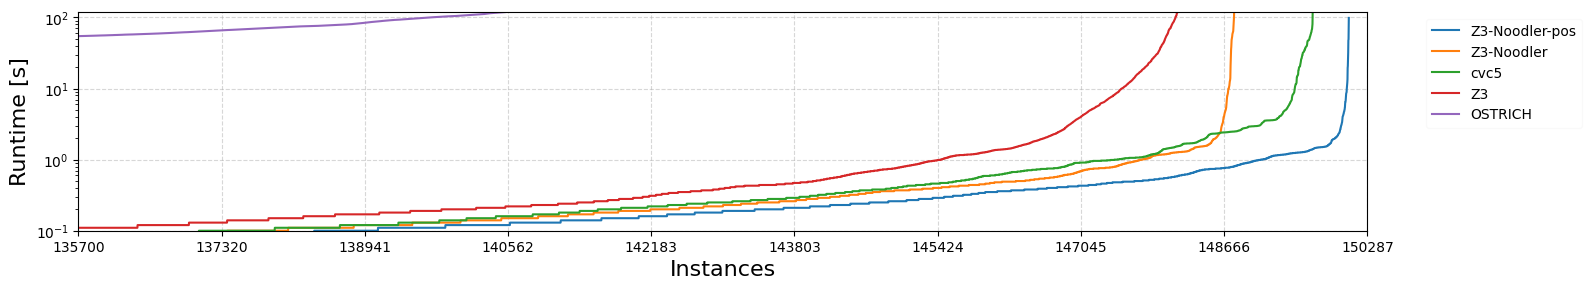

In [28]:
cactus_plot(df_all, [tool for tool in TOOLS if tool not in [
    NOODLER_STATS,
    NOODLER_NO_NIELSEN_STATS,
    NOODLER_NO_LENGTH_STATS,
    NOODLER_NO_MEMB_STATS,
    NOODLER_ONLY_STABILIZATION,
]], start=135700,#int(len(df_all)*0.98), 
height=3, width=16, put_legend_outside=True, logarithmic_y_axis=True,
                  tool_names=tool_names_mapping,
                  file_name_to_save="cactus",
                  num_of_x_ticks=10,
                )

/Users/vhavlena/Documents/VeriFIT/Repo/String/smt-string-bench-results/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
/var/folders/k8/vb71jppj43x35pc3qvksjy4w0000gn/T/ipykernel_20225/3171291488.py:3: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().
/Users/vhavlena/Documents/VeriFIT/Repo/String/smt-string-bench-results/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10


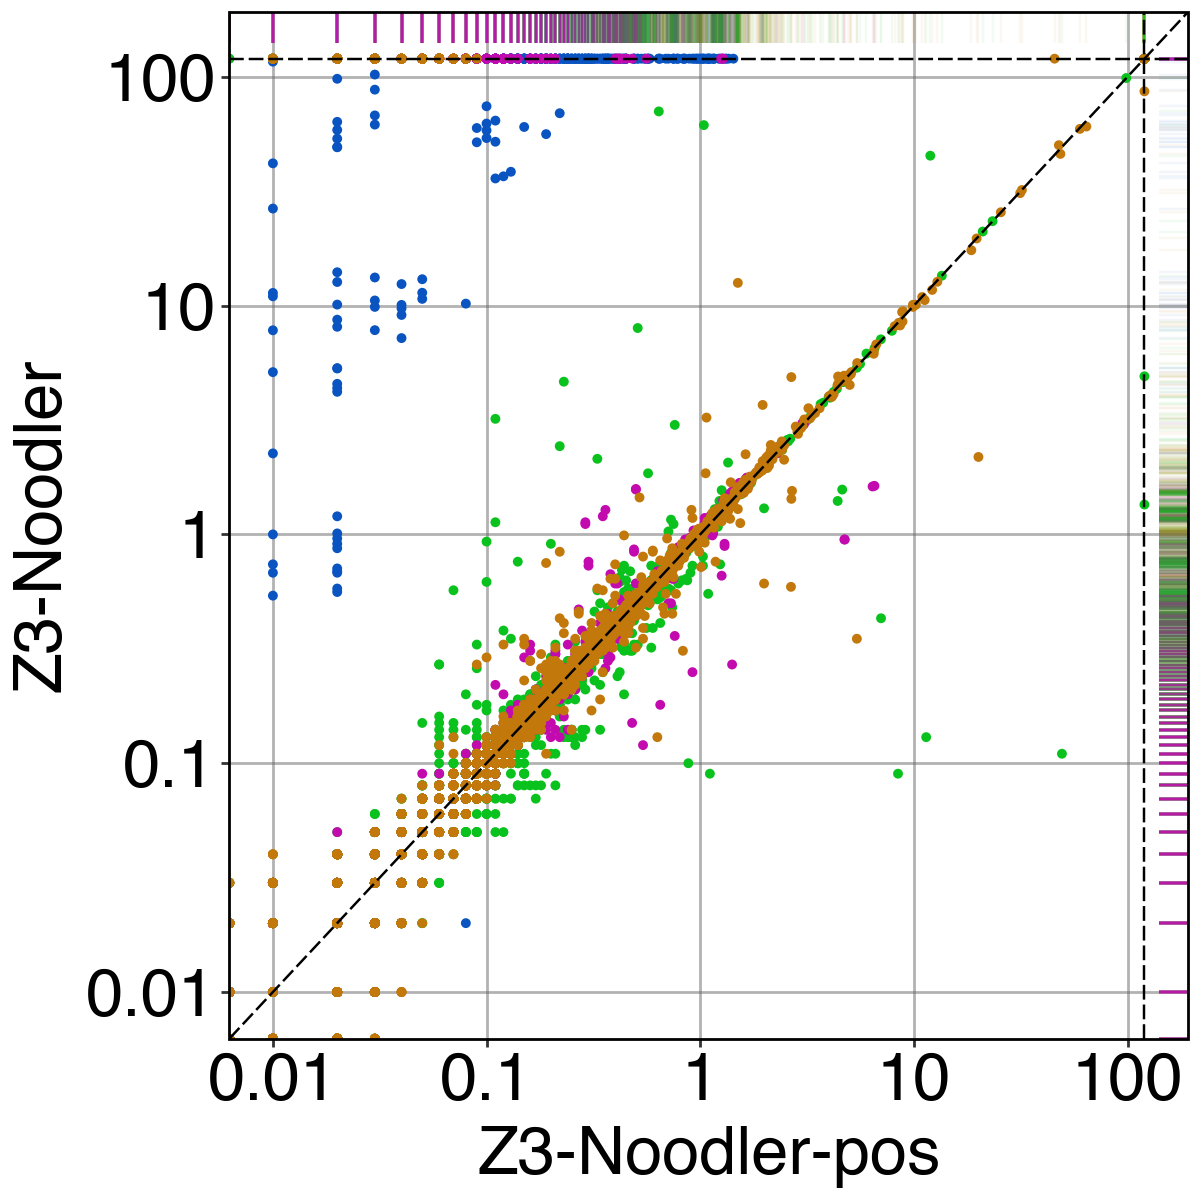

/Users/vhavlena/Documents/VeriFIT/Repo/String/smt-string-bench-results/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
/var/folders/k8/vb71jppj43x35pc3qvksjy4w0000gn/T/ipykernel_20225/3171291488.py:3: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().
/Users/vhavlena/Documents/VeriFIT/Repo/String/smt-string-bench-results/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10


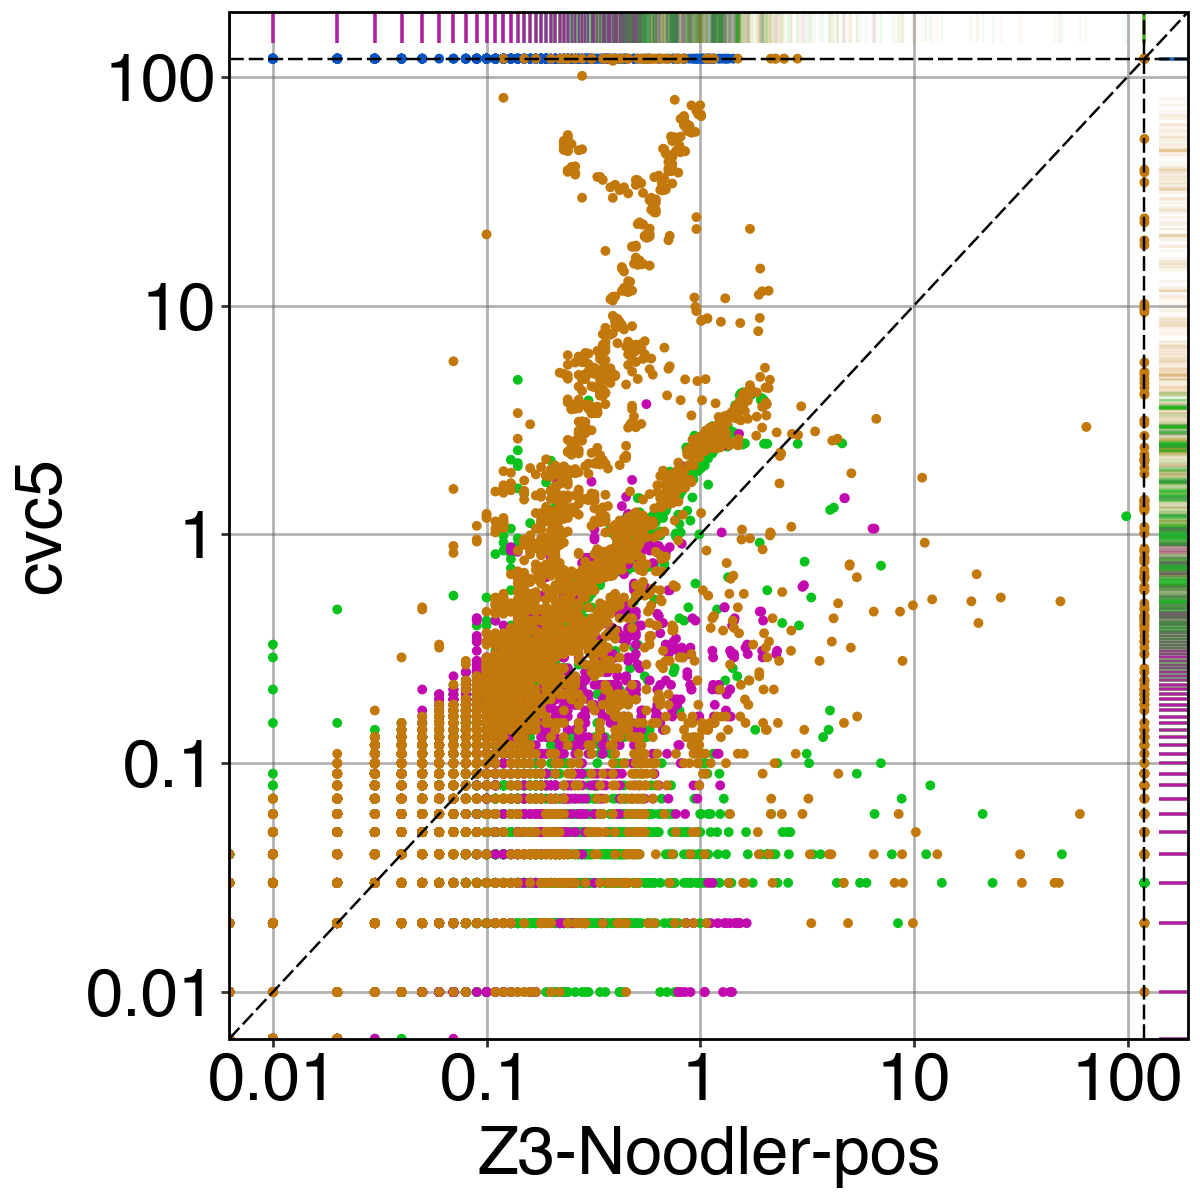

/Users/vhavlena/Documents/VeriFIT/Repo/String/smt-string-bench-results/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
/var/folders/k8/vb71jppj43x35pc3qvksjy4w0000gn/T/ipykernel_20225/3171291488.py:3: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().
/Users/vhavlena/Documents/VeriFIT/Repo/String/smt-string-bench-results/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10


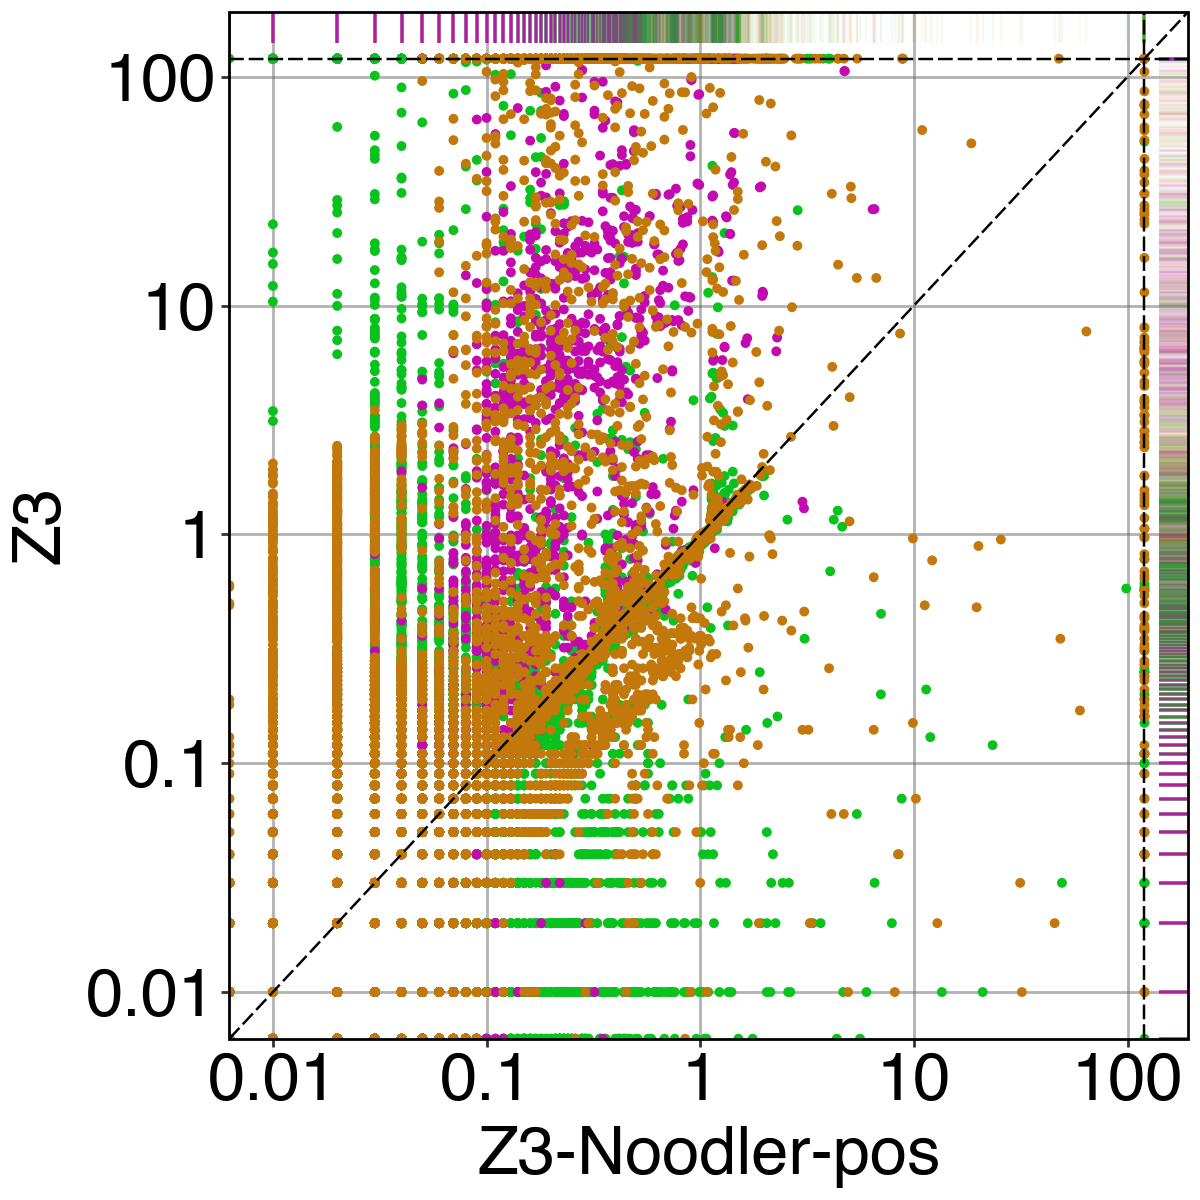

/Users/vhavlena/Documents/VeriFIT/Repo/String/smt-string-bench-results/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
/var/folders/k8/vb71jppj43x35pc3qvksjy4w0000gn/T/ipykernel_20225/3171291488.py:3: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().
/Users/vhavlena/Documents/VeriFIT/Repo/String/smt-string-bench-results/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10


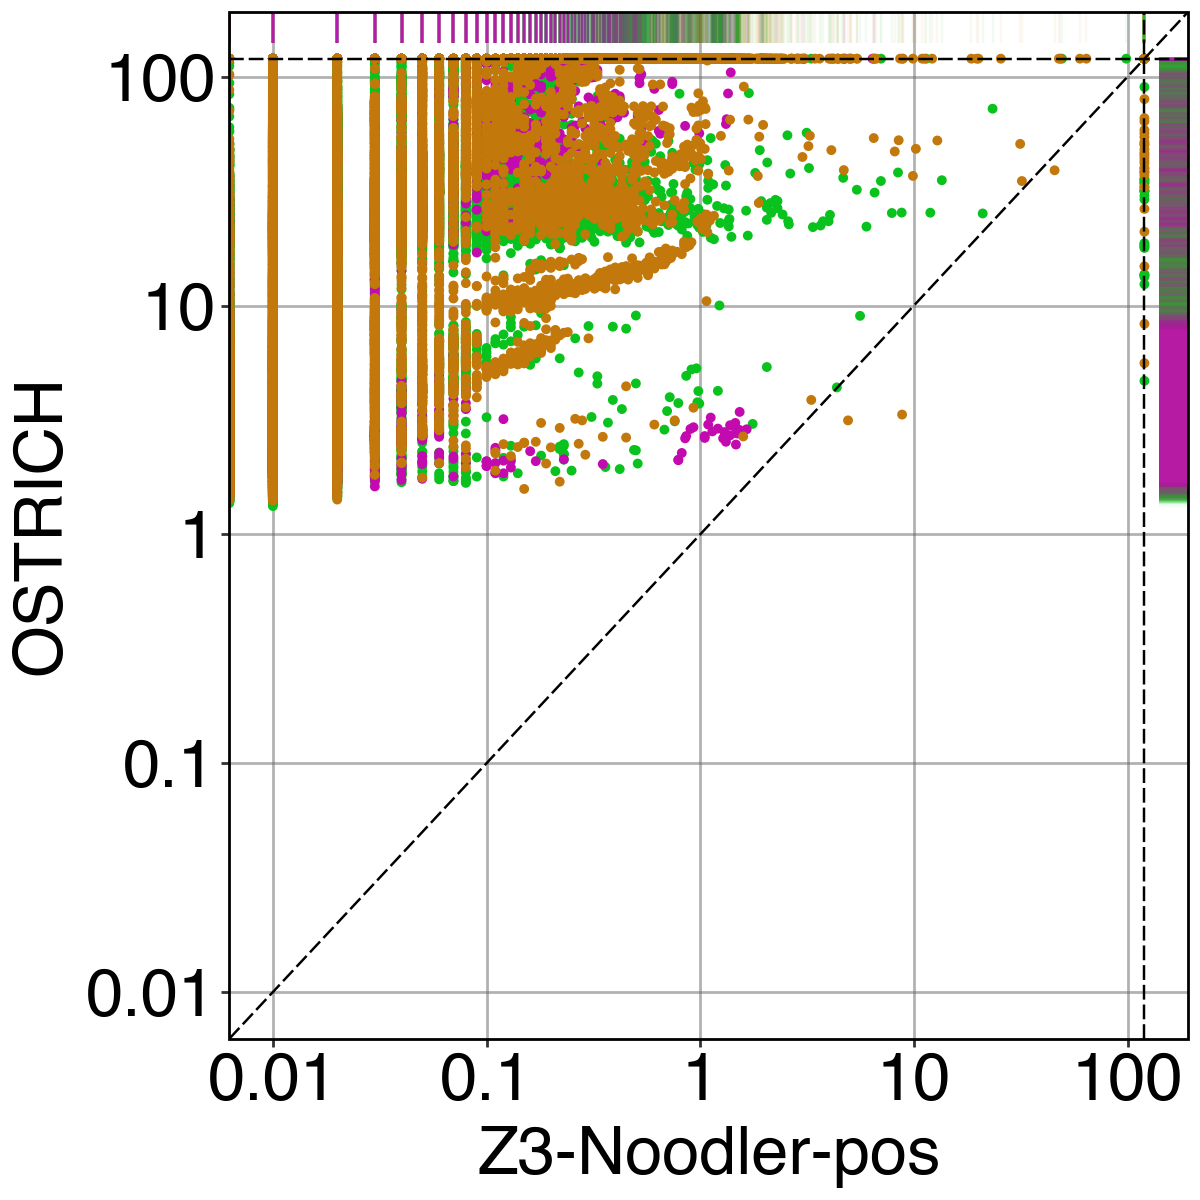

In [11]:
for tool in TOOLS:
    if tool != TOOL_FOR_COMPARISON:
        print(scatter_plot(df_all, TOOL_FOR_COMPARISON, tool,
                           xname=tool_names_mapping[NOODLER], yname=tool_names_mapping[tool],
                           file_name_to_save=f"{tool_names_mapping[tool]}_vs_{tool_names_mapping[TOOL_FOR_COMPARISON]}",
                           show_legend=False, transparent=True,
                           color_column="benchmark"
                           ))

In [15]:
with open("test.tex", "w+") as f:
    f.write('\n'.join(write_latex_table_body(df_all, index_to_latex=BENCHMARK_TO_LATEX)))

In [12]:
BENCHES_STATS = [benchmark for benchmark in BENCHES if benchmark not in ["transducer_plus"]]
df_all_stats = load_benches(BENCHES_STATS, TOOLS_STATS, bench_selection, BENCHMARK_TO_GROUP)
df_all_stats["benchmark_group"] = pd.Categorical(df_all_stats["benchmark"].apply(lambda x: BENCHMARK_TO_GROUP[x]), categories=[EQUATIONS_GROUP_NAME, PREDICATES_GROUP_NAME, REGEX_GROUP_NAME], ordered=True)

KeyError: "['z3-noodler-stats-notcont-721245e-84ecd6a-stats', 'z3-noodler-no-nielsen-stats-notcont-721245e-84ecd6a-stats', 'z3-noodler-no-length-stats-notcont-721245e-84ecd6a-stats', 'z3-noodler-no-memb-stats-notcont-721245e-84ecd6a-stats'] not in index"

In [13]:
df_solved_time = df_all.copy()

df_solved_time.replace({"benchmark": {"snia": "kaluza"}}, inplace=True)

for column in df_solved_time.columns:
    if column.endswith("-runtime"):
        df_solved_time[column] = df_solved_time[column].apply(lambda x: 0 if x == 120 else x)

result_columns = []
for column in df_solved_time.columns:
    if column.endswith("-result"):
        result_columns.append(column)
replace = {}
for result_column in result_columns:
    replace[result_column] = {"sat": 1, "unsat": 1, "unknown": 0, "TO": 0, "ERR": 0, "unsupported": 0}
df_solved_time.replace(replace, inplace=True)

for column in df_solved_time.columns:
    if column.endswith("-result"):
        df_solved_time[column] = df_solved_time[column].astype("Int64")
df_solved_time.drop(columns=["name"], inplace=True)
df_solved_time = df_solved_time[[ \
    "benchmark", "benchmark-group", \
    f"{NOODLER}-result", f"{NOODLER}-runtime", \
    f"{NOODLER_MODEL}-result", f"{NOODLER_MODEL}-runtime", \

    f"{NOODLER_ONLY_STABILIZATION}-result", f"{NOODLER_ONLY_STABILIZATION}-runtime", \

    f"{NOODLER_NO_NIELSEN_STATS}-result", f"{NOODLER_NO_NIELSEN_STATS}-runtime", \
    f"{NOODLER_NO_LENGTH_STATS}-result", f"{NOODLER_NO_LENGTH_STATS}-runtime", \
    f"{NOODLER_NO_MEMB_STATS}-result", f"{NOODLER_NO_MEMB_STATS}-runtime", \

    f"{CVC5}-result", f"{CVC5}-runtime", \
    f"{CVC5_MODEL}-result", f"{CVC5_MODEL}-runtime", \
    f"{Z3}-result", f"{Z3}-runtime", \
    f"{Z3_MODEL}-result", f"{Z3_MODEL}-runtime", \
]]
df_solved_time_per_benchmark = df_solved_time.drop(columns=["benchmark-group"]).groupby("benchmark").sum()

df_solved_time_per_group = df_solved_time.drop(columns=["benchmark"]).groupby("benchmark-group").sum()

df_solved_time_all = df_solved_time.copy()
df_solved_time_all["benchmark-group"] = "all"
df_solved_time_all = df_solved_time_all.drop(columns=["benchmark"]).groupby("benchmark-group").sum()
df_solved_time_per_group_all = pd.concat([df_solved_time_per_group, df_solved_time_all], sort=False)


df_solved_time_per_benchmark = solved_time_transpose_per_benchmark(df_solved_time_per_benchmark)
df_solved_time_per_group = solved_time_transpose_per_benchmark(df_solved_time_per_group)
df_solved_time_per_group_all = solved_time_transpose_per_benchmark(df_solved_time_per_group_all)

# Solved-time table for regex and predicates benchmarks.
regex_predicates_benches = [benchmark for benchmark in REGEX_BENCHES + PREDICATES_BENCHES if benchmark not in ["transducer_plus"]]
regex_predicates_benches_columns = []
for bench in regex_predicates_benches:
    regex_predicates_benches_columns.append(f"{bench}-result")
    regex_predicates_benches_columns.append(f"{bench}-runtime")
table_lines = table_solved_time(df_solved_time_per_benchmark[regex_predicates_benches_columns], df_all, regex_predicates_benches, BENCHMARK_TO_LATEX, tool_latex_mapping)

table_lines.insert(0, "\\begin{booktabs}{colspec={lQ[r,gray!30]Q[r,gray!30]rrQ[r,gray!30]Q[r,gray!30]rrQ[r,gray!30]Q[r,gray!30]rrQ[r,gray!30]Q[r,gray!30]rrQ[r,gray!30]Q[r,gray!30]},rowsep=0pt,row{5-6}={yellow},row{1}={white},cell{2,3}{even}={c=2}{c}}")
table_lines.insert(2, "& \\SetCell[c=10]{c} \\regexbench &&&&&&&&&& \\SetCell[c=8]{c} \\predbench &&&&&&&\\\\\\cmidrule[lr]{2-11}\\cmidrule[lr]{12-19}")
table_lines.insert(len(table_lines), "\\end{booktabs}")
with open("sum_solved_result_per_tool_for_benches_regex_predicates.tex", "w+") as f:
    f.write('\n'.join(table_lines))

# Solved-time table for equations benchmarks.
equations_benches_columns = []
for bench in EQUATIONS_BENCHES:
    equations_benches_columns.append(f"{bench}-result")
    equations_benches_columns.append(f"{bench}-runtime")
table_lines = table_solved_time(df_solved_time_per_benchmark[equations_benches_columns], df_all, EQUATIONS_BENCHES, BENCHMARK_TO_LATEX, tool_latex_mapping)
table_lines.insert(0, "\\begin{booktabs}{colspec={lQ[r,gray!30]Q[r,gray!30]rrQ[r,gray!30]Q[r,gray!30]rrQ[r,gray!30]Q[r,gray!30]rrQ[r,gray!30]Q[r,gray!30]rr},rowsep=0pt,row{5-6}={yellow},row{1}={white},cell{2,3}{even}={c=2}{c}}")
table_lines.insert(2, "& \\SetCell[c=16]{c} \\eqbench &&&&&&&&&&&&&&&\\\\\\cmidrule[lr]{2-17}")
table_lines.insert(len(table_lines), "\\end{booktabs}")
with open("sum_solved_result_per_tool_for_benches_equations.tex", "w+") as f:
    f.write('\n'.join(table_lines))


# Solved-time table for benchmark groups.
benchmark_group_names = list(BENCHES_GROUPS.keys()) + ["all"]
benches_groups_columns = []
for bench in benchmark_group_names:
    benches_groups_columns.append(f"{bench}-result")
    benches_groups_columns.append(f"{bench}-runtime")
table_lines = table_solved_time(df_solved_time_per_group_all[benches_groups_columns], df_all, benchmark_group_names, BENCHMARK_TO_LATEX, tool_latex_mapping, per_column="benchmark-group")
table_lines.insert(0, "\\begin{booktabs}{colspec={lQ[r,gray!30]Q[r,gray!30]rrQ[r,gray!30]Q[r,gray!30]rr},rowsep=0pt,row{4-5}={yellow},cell{1,2}{even}={c=2}{c}}")
# table_lines.insert(2, "& \\SetCell[c=2]{c} \\regexbench & & \\SetCell[c=2]{c} \\eqbench & & \\SetCell[c=2]{c} \\predbench & & \\SetCell[c=2]{c} All & \\\\\\cmidrule[lr]{2-9}")
table_lines.insert(len(table_lines), "\\end{booktabs}")
with open("sum_solved_result_per_tool_for_benchmark_groups.tex", "w+") as f:
    f.write('\n'.join(table_lines))

/var/folders/k8/vb71jppj43x35pc3qvksjy4w0000gn/T/ipykernel_20225/3741486488.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


KeyError: "['z3-noodler-model-notcont-721245e-84ecd6a-result', 'z3-noodler-model-notcont-721245e-84ecd6a-runtime', 'z3-noodler-only-stabilization-notcont-721245e-84ecd6a-result', 'z3-noodler-only-stabilization-notcont-721245e-84ecd6a-runtime', 'z3-noodler-no-nielsen-stats-notcont-721245e-84ecd6a-result', 'z3-noodler-no-nielsen-stats-notcont-721245e-84ecd6a-runtime', 'z3-noodler-no-length-stats-notcont-721245e-84ecd6a-result', 'z3-noodler-no-length-stats-notcont-721245e-84ecd6a-runtime', 'z3-noodler-no-memb-stats-notcont-721245e-84ecd6a-result', 'z3-noodler-no-memb-stats-notcont-721245e-84ecd6a-runtime', 'cvc5-model-1.2.0-result', 'cvc5-model-1.2.0-runtime', 'z3-model-4.13.0-result', 'z3-model-4.13.0-runtime'] not in index"

# Noodler Statistics

In [14]:
order = []
for key in BENCHMARK_TO_GROUP.keys():
    if key == "transducer_plus":
        continue
    if key not in order:
        order.append(key)
for value in BENCHMARK_TO_GROUP.values():
    if value not in order:
        order.append(value)
df_stats, df_stats_zeroed_nans = get_stats_dfs(df_all_stats, NOODLER_STATS, order)
df_stats_groups = group_to_benchmark_groups(df_stats, BENCHMARK_TO_GROUP, order)
df_stats_groups_zeroed_nans = group_to_benchmark_groups(df_stats_zeroed_nans, BENCHMARK_TO_GROUP, order)

NameError: name 'df_all_stats' is not defined

In [ ]:
df_stats_groups

In [ ]:
df_stats_zeroed_nans

In [ ]:
get_stats_grouped_by_benchmark(df_stats_zeroed_nans, NOODLER_STATS)

In [ ]:
get_stats_grouped_by_benchmark(df_stats_groups_zeroed_nans, NOODLER_STATS)

In [ ]:
get_stats_grouped_by_benchmark_counts(df_stats, NOODLER_STATS)

In [ ]:
get_stats_grouped_by_benchmark_counts(df_stats_groups, NOODLER_STATS)

In [ ]:
get_stats_total(df_stats_zeroed_nans, NOODLER_STATS, BENCHES)

In [ ]:
df_stats_per_benchmark_sum = get_stats_per_benchmark_paper(df_stats_zeroed_nans)
df_stats_per_benchmark_sum

In [29]:
with open("stats_per_benchmark.tex", "w+") as f:
    f.write('\n'.join(write_latex_table_body(df_stats_per_benchmark_sum, index_to_latex=BENCHMARK_TO_LATEX)[4:-2]))
with open("stats_per_benchmark_no_preprocess.tex", "w+") as f:
    f.write('\n'.join(write_latex_table_body(df_stats_per_benchmark_sum.drop([benchmark for benchmark in df_stats_per_benchmark_sum.keys() if benchmark.endswith("-preprocess")], axis='columns'), index_to_latex=BENCHMARK_TO_LATEX)[4:-2]))
with open("stats_per_benchmark_no_preprocess_percents.tex", "w+") as f:
    f.write('\n'.join(write_latex_table_body(df_stats_per_benchmark_sum.drop([benchmark for benchmark in df_stats_per_benchmark_sum.keys() if benchmark.endswith("-preprocess")], axis='columns'),index_to_latex=BENCHMARK_TO_LATEX, float_format="{:.2f}\\,\\%")[4:-2]))

In [ ]:
df_stats_per_group_sum = get_stats_per_benchmark_paper(df_stats_groups_zeroed_nans)
df_stats_per_group_sum

In [31]:
with open("stats_per_group.tex", "w+") as f:
    f.write('\n'.join(write_latex_table_body(df_stats_per_group_sum, index_to_latex=BENCHMARK_TO_LATEX, float_format="{:.2f}")[4:-2]))

with open("stats_per_group_no_preprocess_no_preprocess.tex", "w+") as f:
    f.write('\n'.join(write_latex_table_body(df_stats_per_group_sum.drop([benchmark for benchmark in df_stats_per_group_sum.keys() if benchmark.endswith("-preprocess")], axis='columns'),index_to_latex=BENCHMARK_TO_LATEX)[4:-2]))

with open("stats_per_group_no_preprocess_percents.tex", "w+") as f:
    f.write('\n'.join(write_latex_table_body(df_stats_per_benchmark_sum.drop([benchmark for benchmark in df_stats_per_benchmark_sum.keys() if benchmark.endswith("-preprocess")], axis='columns'),index_to_latex=BENCHMARK_TO_LATEX, float_format="{:.2f}\\,\\%")[4:-2]))

In [ ]:
df_stats_total_sum = get_stats_per_benchmark_paper(group_to_benchmark_groups(df_stats_zeroed_nans, lambda _: "total"))
df_stats_total_sum

In [ ]:
df_stats_groups_total = pd.concat([df_stats_per_group_sum, df_stats_total_sum])
df_stats_groups_total = df_stats_groups_total.drop("noodler-final_checks", axis='columns')
df_stats_groups_total

In [ ]:
with open("stats_per_group_total.tex", "w+") as f:
    f.write('\n'.join(write_latex_table_body(df_stats_groups_total, index_to_latex=BENCHMARK_TO_LATEX)[4:-2]))

with open("stats_per_group_total_no_preprocess.tex", "w+") as f:
    f.write('\n'.join(write_latex_table_body(df_stats_groups_total.drop([benchmark for benchmark in df_stats_per_group_sum.keys() if benchmark.endswith("-preprocess")], axis='columns'), index_to_latex=BENCHMARK_TO_LATEX)[4:-2]))

with open("stats_per_group_total_no_preprocess_percents.tex", "w+") as f:
    f.write('\n'.join(write_latex_table_body(df_stats_groups_total.drop([benchmark for benchmark in df_stats_groups_total.keys() if benchmark.endswith("-preprocess")], axis='columns'), index_to_latex=BENCHMARK_TO_LATEX, float_format="{:.2f}\\,\\%")[4:-2]))

df_stats_groups_total_transposed = df_stats_groups_total.transpose()

with open("stats_per_group_total_transposed.tex", "w+") as f:
    f.write('\n'.join(write_latex_table_body(df_stats_groups_total_transposed, index_to_latex=BENCHMARK_TO_LATEX, format_index_name=False)[3:-2]))

df_stats_groups_total_transposed = df_stats_groups_total.drop([benchmark for benchmark in df_stats_groups_total if benchmark.endswith("-preprocess")], axis='columns').transpose()

with open("stats_per_group_total_no_preprocess_transposed.tex", "w+") as f:
    f.write('\n'.join(write_latex_table_body(df_stats_groups_total_transposed, index_to_latex=BENCHMARK_TO_LATEX, format_index_name=False)[3:-2]))

with open("stats_per_group_total_no_preprocess_percents_transposed.tex", "w+") as f:
    f.write('\n'.join(write_latex_table_body(df_stats_groups_total_transposed, index_to_latex=BENCHMARK_TO_LATEX, float_format="{:.2f}\\,\\%", format_index_name=False)[3:-2]))

df_stats_groups_total_special_transposed = pd.DataFrame(columns=list(df_stats_groups_total_transposed.keys()))

concat_rows = []
for index, _ in df_stats_groups_total_transposed.iterrows():
    if not index.endswith("-start"):
        continue

    index_start_name = index
    index_finish_name = index_start_name.replace("-start", "-finish")
    procedure_name = index_start_name.replace("-start", "")
    start_row = df_stats_groups_total_transposed.loc[[index_start_name]]
    finish_row = df_stats_groups_total_transposed.loc[[index_finish_name]]

    concat_row = [procedure_name]
    values_start = list(start_row.values)
    values_finish = list(finish_row.values)
    for val_start, val_finish in zip(values_start, values_finish):
        for val_start, val_finish in zip(val_start, val_finish):
            concat_row += [val_start, val_finish]

    concat_rows.append(concat_row)

columns = ["procedure"]
for column in df_stats_groups_total_transposed.keys():
    columns.append(f"{column}-start")
    columns.append(f"{column}-finish")
df_concat_rows = pd.DataFrame(concat_rows, columns=columns)
df_concat_rows.set_index("procedure", inplace=True)

with open("stats_per_group_total_special_transposed.tex", "w+") as f:
    f.write('\n'.join(write_latex_table_body(df_concat_rows, index_to_latex=BENCHMARK_TO_LATEX)[4:-2]))